# EDA (`E`xploratory `D`ata `A`nalysis) 
- The reasoning behind this approach was to examine the data before building a model
- Today almost every Data scientists and analysts spend most of their time in `Data Wrangling` and `Exploratory Data Analysis also known as EDA`

# What is Exploratory Data Analysis?

Exploratory Data Analysis or EDA technique is used for getting insights from the data. Data Scientists and Analysts try to find `different patterns`, `relations`, and `anomalies in the data` using some statistical graphs and other visualization techniques. Following things are part of EDA :

- Get maximum insights from a data set
- Uncover underlying structure
- Extract important variables from the dataset
- Detect outliers and anomalies(if any)
- Test underlying assumptions
- Determine the optimal factor settings


# Why EDA is important?
The main purpose of EDA is to :
- Detect any errors, 
- Outliers as well as 
- To understand different patterns in the data. 
- It allows Analysts to understand the data better before making any assumptions. 
- The outcomes of EDA helps businesses to know their customers, expand their business and take decisions accordingly.

# How to perform EDA?

- Following steps are most commonly used to perform EDA:
    

## Import libraries and load dataset

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data set and see top and bottom rows to have quick glimpse of data

In [44]:
df = pd.read_csv("./05_chat_Data/Chat_Team_CaseStudy.csv")

In [45]:
df.head(2)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,08-06-18 23:59,Zaha,0:18:22,Mobile Service Team,Session:2057187615:23360,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,08-07-18 0:18,,,False,0:00:01
1,08-06-18 23:59,Berenice,0:03:05,Mobile Technical Team,Session:2057187614:23368,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,08-07-18 0:02,,,True,0:01:01


In [46]:
df.tail(2)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
31950,08-06-18 0:00,Legalos,0:15:13,Mobile Service Team,Session:2057187615:7772,0,Customer,True,Other,11.4.1,NaN,0:00:51,0:01:00,08-06-18 0:27,,,False,0:00:00
31951,08-06-18 0:00,Paisley,0:03:06,Mobile Service Team,Session:2057187617:29175,0,Representative,False,Other,MacOS,NaN,0:00:00,0:00:00,08-06-18 0:03,,,False,0:00:52


## Get shape of data to understand number of observations

In [47]:
df.shape

(31952, 18)

## Get Feature names of dataset

In [48]:
df.keys()

Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Order Value', 'Chat Closed By', 'Interactive Chat',
       'Browser', 'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Rating',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time'],
      dtype='object')

In [49]:
df.columns

Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Order Value', 'Chat Closed By', 'Interactive Chat',
       'Browser', 'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Rating',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time'],
      dtype='object')

## Get full Decription/summary of dataset

In [50]:
df.describe()

,Order Value
count,31952.000000
mean,1.242927
std,50.249189
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4512.000000


## Get full info about all variables/features of dataset

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Transaction Start Date    31952 non-null  object
 1   Agent                     31952 non-null  object
 2   Chat Duration             31952 non-null  object
 3   Teams                     31952 non-null  object
 4   Session Name              31952 non-null  object
 5   Order Value               31952 non-null  int64 
 6   Chat Closed By            31741 non-null  object
 7   Interactive Chat          31952 non-null  bool  
 8   Browser                   31952 non-null  object
 9   Operating System          31952 non-null  object
 10  Geo                       17665 non-null  object
 11  Response Time of Agent    31952 non-null  object
 12  Response time of Visitor  31952 non-null  object
 13  Transaction End Date      31952 non-null  object
 14  Customer Rating       

In [52]:
df.dtypes

Transaction Start Date      object
Agent                       object
Chat Duration               object
Teams                       object
Session Name                object
Order Value                  int64
Chat Closed By              object
Interactive Chat              bool
Browser                     object
Operating System            object
Geo                         object
Response Time of Agent      object
Response time of Visitor    object
Transaction End Date        object
Customer Rating             object
Customer Comment            object
Transferred Chat              bool
Customer Wait Time          object
dtype: object

## Understand the data types of Dataset and downgrade its type to save memory

In [53]:
# Home work
# df["Order Value"] # can be type casted to int16

## See if any missing values are present in data set

In [54]:
df.isnull().sum()

Transaction Start Date          0
Agent                           0
Chat Duration                   0
Teams                           0
Session Name                    0
Order Value                     0
Chat Closed By                211
Interactive Chat                0
Browser                         0
Operating System                0
Geo                         14287
Response Time of Agent          0
Response time of Visitor        0
Transaction End Date            0
Customer Rating                 0
Customer Comment                0
Transferred Chat                0
Customer Wait Time              0
dtype: int64

## Get unique values for each feature, this will help you to get to know if any unwanted characters are present in dataset

In [57]:
for k in df.keys():
    print(k,df[k].unique()[:5])

Transaction Start Date ['08-06-18 23:59' '08-06-18 23:58' '08-06-18 23:57' '08-06-18 23:56'
 '08-06-18 23:55']
Agent ['Zaha' 'Berenice' 'Madi' 'Rose' 'Sarrah']
Chat Duration ['0:18:22' '0:03:05' '0:22:33' '0:38:20' '0:11:50']
Teams ['Mobile Service Team' 'Mobile Technical Team' 'Fixed Service Team'
 'Sales Team' 'Fixed Technical Team']
Session Name ['Session:2057187615:23360' 'Session:2057187614:23368'
 'Session:2057187615:23358' 'Session:2057187616:18361'
 'Session:2057187617:2598']
Order Value [   0  432  540 2016 1896]
Chat Closed By ['Customer' 'Representative' 'System' nan]
Interactive Chat [ True False]
Browser ['Edge 16.16299' 'Edge' 'c~67.0.3396.87' 'Other' 'Chrome']
Operating System ['Windows-10' 'Windows' 'Android-4.3' '11.4.1' 'Android 8.1.0']
Geo ['Sweden' 'Australia' nan 'Philippines' 'Germany']
Response Time of Agent ['0:01:02' '0:00:00' '0:00:32' '0:00:37' '0:00:21']
Response time of Visitor ['0:00:43' '0:00:00' '0:01:28' '0:01:18' '0:00:38']
Transaction End Date ['08-07

## Visualize missing values of data set

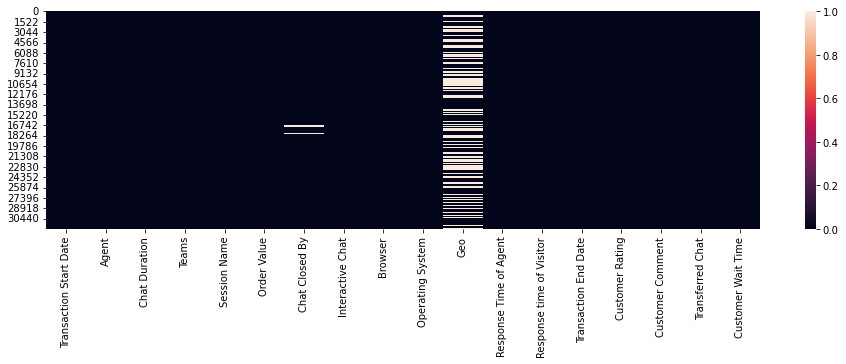

In [59]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [60]:
df["Geo"].value_counts()

Australia              16636
United States            390
UNKNOWN                  116
Asia/Pacific Region       98
United Kingdom            53
                       ...  
Turkey                     1
Morocco                    1
Belarus                    1
Slovenia                   1
Lebanon                    1
Name: Geo, Length: 62, dtype: int64

<AxesSubplot:>

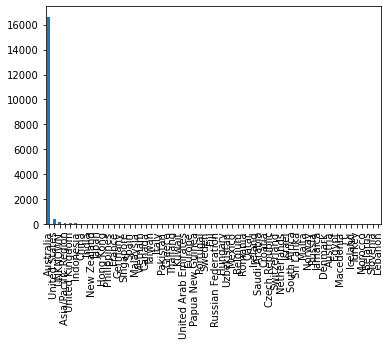

In [61]:
df["Geo"].value_counts().plot(kind="bar")

<AxesSubplot:>

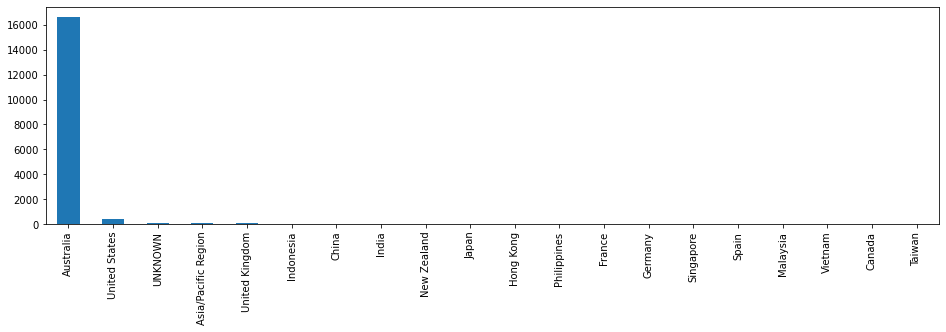

In [65]:
df["Geo"].value_counts().nlargest(20).plot(kind="bar",figsize=(16,4))

## Decide if features needs to be dropped
- Some important factors which helps to drop feature(s):
     - If more than 10% values are empty in a given feature, drop them until it really contributes to EDA
     - Some features like person name, ID, pin code, SSN etc. doesnt add much value because they are unique
     - There could be 2 features which is similar in nature, choose one of them

In [66]:
df.head(2)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,08-06-18 23:59,Zaha,0:18:22,Mobile Service Team,Session:2057187615:23360,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,08-07-18 0:18,,,False,0:00:01
1,08-06-18 23:59,Berenice,0:03:05,Mobile Technical Team,Session:2057187614:23368,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,08-07-18 0:02,,,True,0:01:01


In [69]:
df.drop(["Transaction Start Date","Session Name","Transaction End Date"],axis=1,inplace=True)

In [70]:
df.head(5)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,0:18:22,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,,,False,0:00:01
1,Berenice,0:03:05,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,,,True,0:01:01
2,Madi,0:22:33,Mobile Service Team,0,Customer,True,c~67.0.3396.87,Android-4.3,Australia,0:00:32,0:01:28,,,False,0:00:01
3,Rose,0:38:20,Mobile Service Team,0,System,True,Other,11.4.1,NaN,0:00:37,0:01:18,,,False,0:00:01
4,Sarrah,0:11:50,Fixed Service Team,0,Representative,True,Other,Android 8.1.0,NaN,0:00:21,0:00:38,,,False,0:00:01


## Fill missing values
- Some important factors which helps to fill empty data
    - if feature has `categorical data` then replace empty value using `mode()`
    - if feature has `discrete data` and range is very less (1-10), go with `mode()`,because they will be categorical data else go with `median()`
    - if feature has `continous data` then go with `median()`

In [72]:
df["Chat Closed By"].unique()

array(['Customer', 'Representative', 'System', nan], dtype=object)

In [73]:
df["Chat Closed By"].value_counts()

Customer          13375
System             9893
Representative     8473
Name: Chat Closed By, dtype: int64

In [74]:
df["Chat Closed By"].mode()

0    Customer
dtype: object

In [75]:
df["Chat Closed By"].mode()[0]

'Customer'

In [77]:
df["Chat Closed By"].fillna(df["Chat Closed By"].mode()[0],inplace=True)

In [78]:
df["Chat Closed By"].isnull().sum()

0

## Visualize missing values again to make sure that all features are having `0` missing values

<AxesSubplot:>

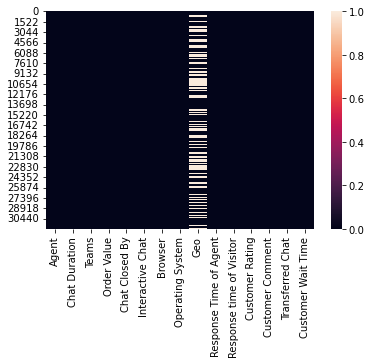

In [79]:
sns.heatmap(df.isnull())

## Find out correlation and perform visualization using heatmap

In [81]:
# NA

## Find out highly correlated features

In [82]:
# NA

## Find out features which needs type casting

In [83]:
# Order vlaue can be type casted

# Data transformation for few columns

In [84]:
df.head(5)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,0:18:22,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,,,False,0:00:01
1,Berenice,0:03:05,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,,,True,0:01:01
2,Madi,0:22:33,Mobile Service Team,0,Customer,True,c~67.0.3396.87,Android-4.3,Australia,0:00:32,0:01:28,,,False,0:00:01
3,Rose,0:38:20,Mobile Service Team,0,System,True,Other,11.4.1,NaN,0:00:37,0:01:18,,,False,0:00:01
4,Sarrah,0:11:50,Fixed Service Team,0,Representative,True,Other,Android 8.1.0,NaN,0:00:21,0:00:38,,,False,0:00:01


In [87]:
df["Chat Duration"].isnull().sum()

0

In [88]:
df["Chat Duration"][0]

'0:18:22'

In [95]:
lam = lambda x:int(x.split(":")[0])*60+int(x.split(":")[1])+int(x.split(":")[2])/60
lam(df["Chat Duration"][0])

18.366666666666667

## Lets transform `Chat Duration`

In [96]:
df["Chat Duration"] = df["Chat Duration"].map(lam)

In [97]:
df["Chat Duration"][:5]

0    18.366667
1     3.083333
2    22.550000
3    38.333333
4    11.833333
Name: Chat Duration, dtype: float64

## Lets transform `Response Time of Agent`

In [101]:
df["Response Time of Agent"].unique()[:50]

array(['0:01:02', '0:00:00', '0:00:32', '0:00:37', '0:00:21', '0:00:33',
       '0:01:07', '0:00:43', ' ', '0:00:56', '0:00:22', '0:01:40',
       '0:00:41', '0:00:51', '0:00:35', '0:00:26', '0:01:30', '0:00:28',
       '0:01:06', '0:01:09', '0:00:14', '0:00:59', '0:00:54', '0:01:38',
       '0:00:36', '0:00:23', '0:00:40', '0:00:50', '0:00:38', '0:01:17',
       '0:01:18', '0:00:25', '0:01:04', '0:00:34', '0:00:29', '0:00:18',
       '0:01:10', '0:00:57', '0:00:44', '0:00:16', '0:00:39', '0:00:12',
       '0:00:47', '0:00:46', '0:00:49', '0:00:19', '0:01:23', '0:01:00',
       '0:01:08', '0:00:31'], dtype=object)

In [103]:
df["Response Time of Agent"].replace({" ":"0:0:0"},inplace=True)

In [104]:
df["Response Time of Agent"] = df["Response Time of Agent"].map(lam)

In [105]:
df["Response Time of Agent"][:5]

0    1.033333
1    0.000000
2    0.533333
3    0.616667
4    0.350000
Name: Response Time of Agent, dtype: float64

## Lets transform `Customer Wait Time`

In [107]:
df["Customer Wait Time"] = df["Customer Wait Time"].map(lam)

In [108]:
df["Customer Wait Time"][:5]

0    0.016667
1    1.016667
2    0.016667
3    0.016667
4    0.016667
Name: Customer Wait Time, dtype: float64

## Lets transform `Response time of Visitor`

In [112]:
df["Response time of Visitor"].unique()[:20]

array(['0:00:43', '0:00:00', '0:01:28', '0:01:18', '0:00:38', '0:01:39',
       '0:01:07', '0:00:34', ' ', '0:01:06', '0:00:24', '0:00:32',
       '0:00:13', '0:00:45', '0:02:39', '0:00:33', '0:00:35', '0:00:17',
       '0:00:28', '0:02:29'], dtype=object)

In [113]:
df["Response time of Visitor"].replace({" ":"0:0:0"},inplace=True)

In [114]:
df["Response time of Visitor"] = df["Response time of Visitor"].map(lam)

In [115]:
df["Response time of Visitor"][:5]

0    0.716667
1    0.000000
2    1.466667
3    1.300000
4    0.633333
Name: Response time of Visitor, dtype: float64

# Infer insights of Data after All the above process are completed using Visualization

In [116]:
df.head(5)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667
2,Madi,22.550000,Mobile Service Team,0,Customer,True,c~67.0.3396.87,Android-4.3,Australia,0.533333,1.466667,,,False,0.016667
3,Rose,38.333333,Mobile Service Team,0,System,True,Other,11.4.1,NaN,0.616667,1.300000,,,False,0.016667
4,Sarrah,11.833333,Fixed Service Team,0,Representative,True,Other,Android 8.1.0,NaN,0.350000,0.633333,,,False,0.016667


## Count of categorical data

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chat Closed By', ylabel='count'>

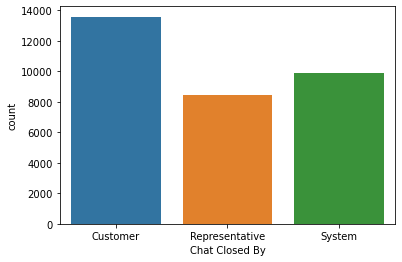

In [117]:
sns.countplot(df["Chat Closed By"])

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interactive Chat', ylabel='count'>

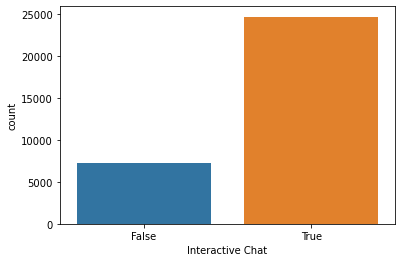

In [118]:
sns.countplot(df["Interactive Chat"])

In [119]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser', ylabel='count'>

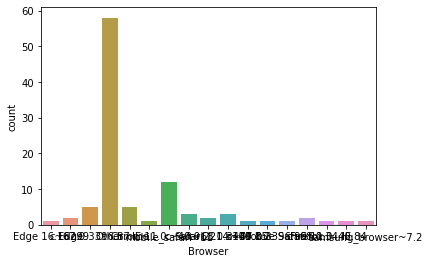

In [122]:
sns.countplot(df["Browser"][:100])

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser', ylabel='count'>

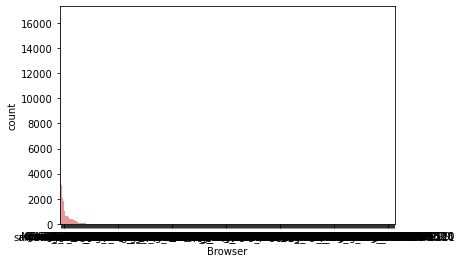

In [123]:
sns.countplot(df["Browser"],order=df["Browser"].value_counts().index)

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


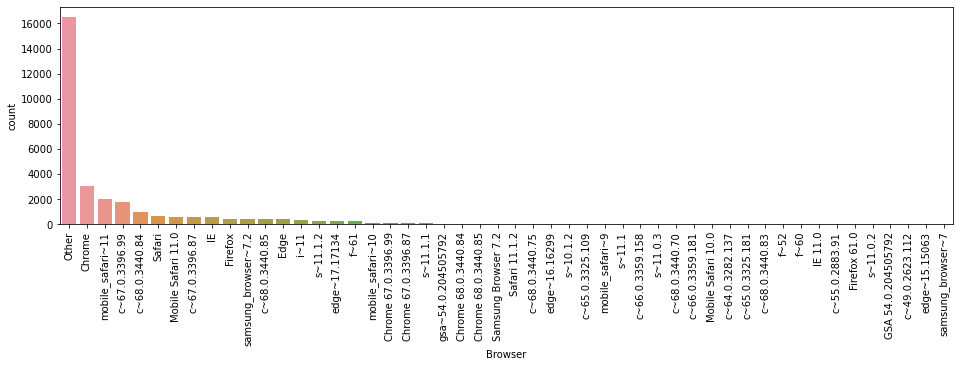

In [127]:
plt.figure(figsize=(16,4))
sns.countplot(df["Browser"],order=df["Browser"].value_counts().index[:50])
plt.xticks(rotation=90)
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


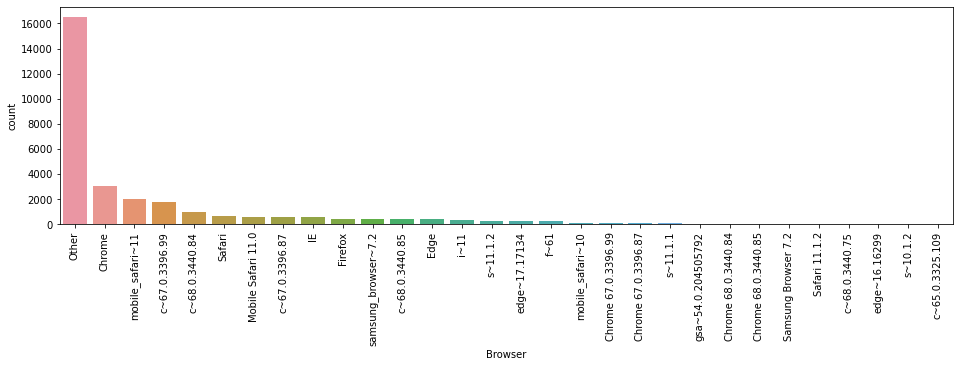

In [128]:
plt.figure(figsize=(16,4))
sns.countplot(df["Browser"],order=df["Browser"].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

In [129]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


## Histogram for discrete data to understand central tendency of data

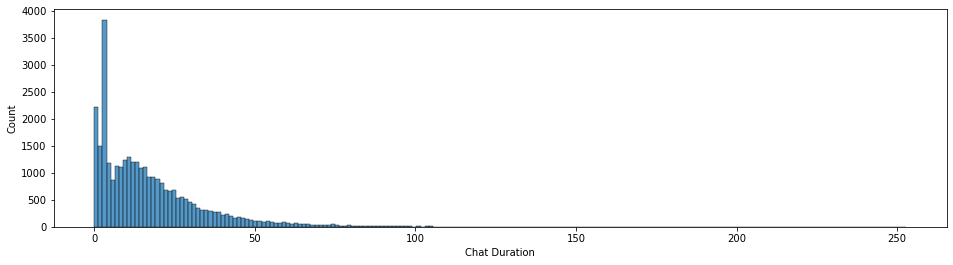

In [131]:
plt.figure(figsize=(16,4))
sns.histplot(df["Chat Duration"])
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


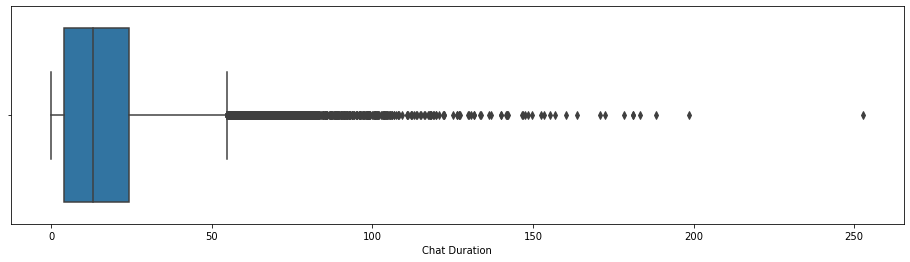

In [132]:
plt.figure(figsize=(16,4))
sns.boxplot(df["Chat Duration"])
plt.show()

In [134]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


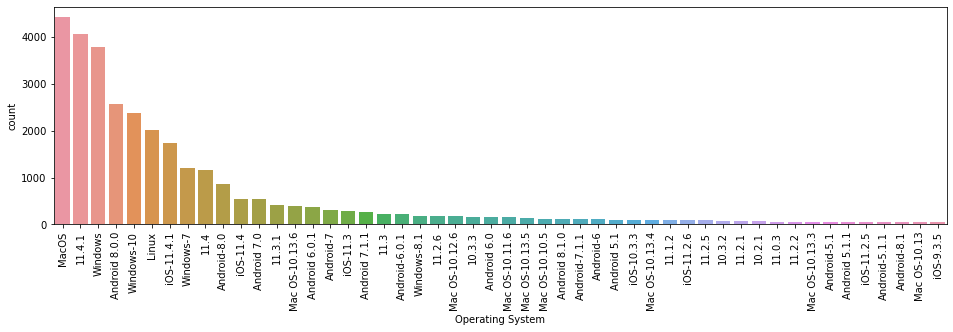

In [136]:
plt.figure(figsize=(16,4))
sns.countplot(df["Operating System"],order=df["Operating System"].value_counts().index[:50])
plt.xticks(rotation=90)
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


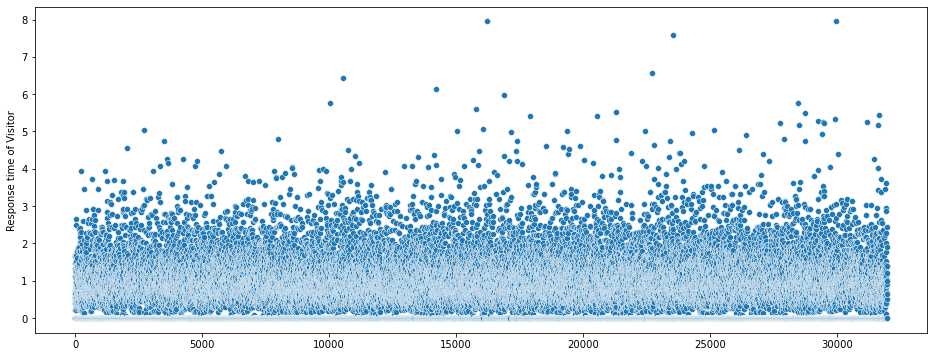

In [139]:
plt.figure(figsize=(16,6))
sns.scatterplot(df.index,df["Response time of Visitor"])
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


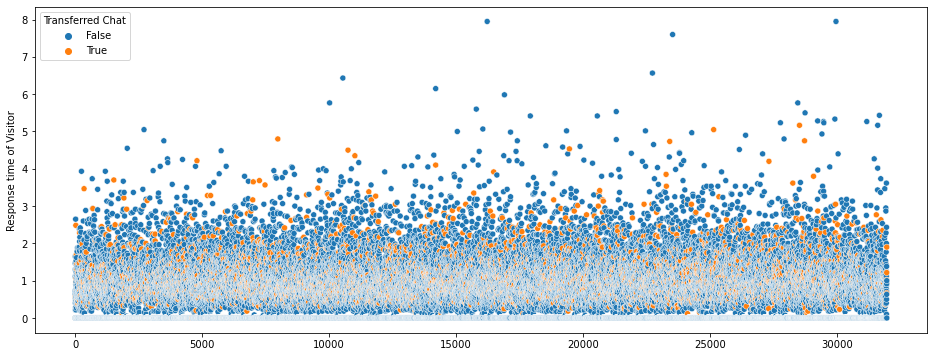

In [140]:
plt.figure(figsize=(16,6))
sns.scatterplot(df.index,df["Response time of Visitor"],hue=df["Transferred Chat"])
plt.show()

In [141]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


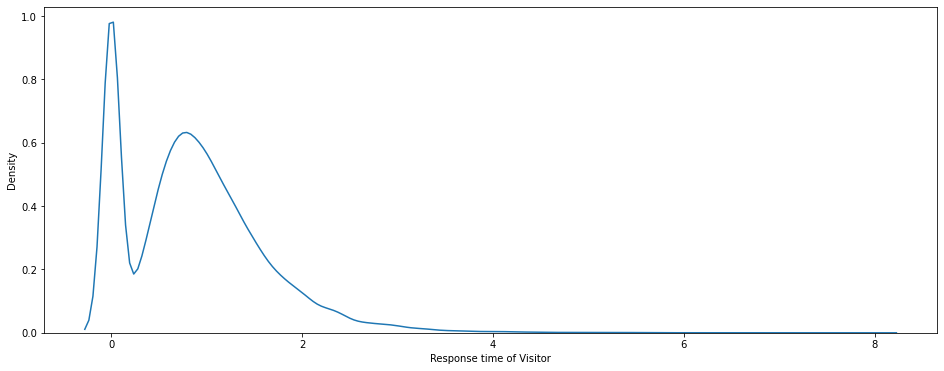

In [142]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"])
plt.show()

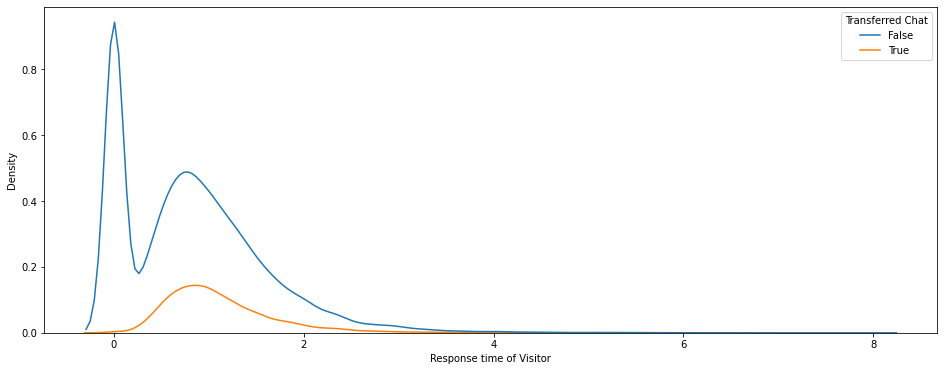

In [143]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"],hue=df["Transferred Chat"])
plt.show()

In [144]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


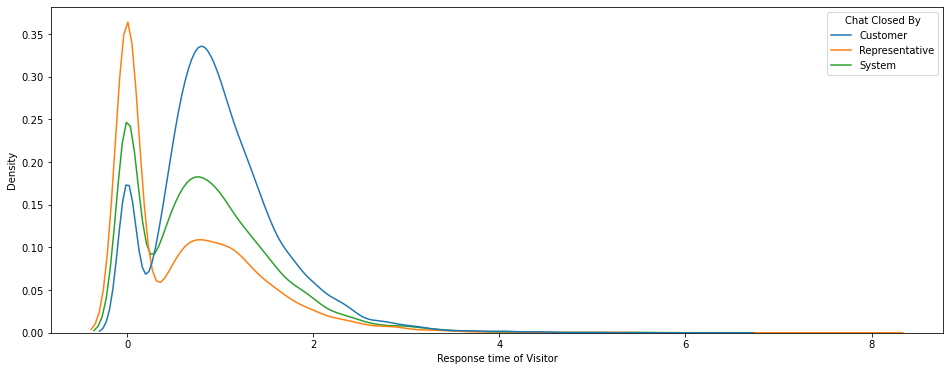

In [145]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"],hue=df["Chat Closed By"])
plt.show()

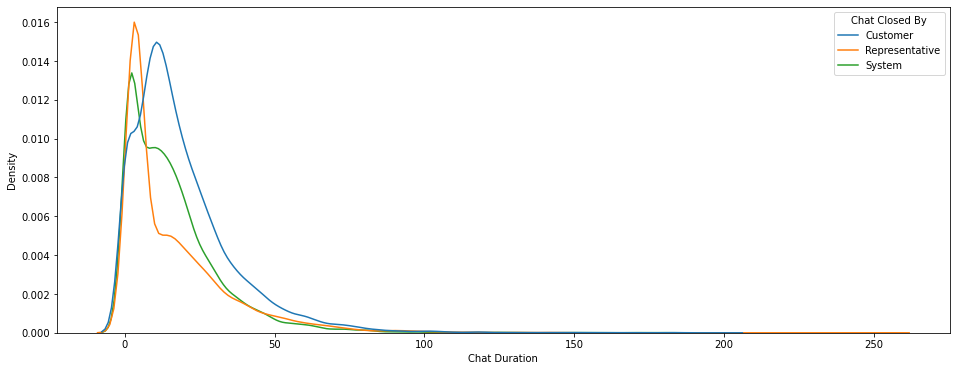

In [146]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Chat Duration"],hue=df["Chat Closed By"])
plt.show()

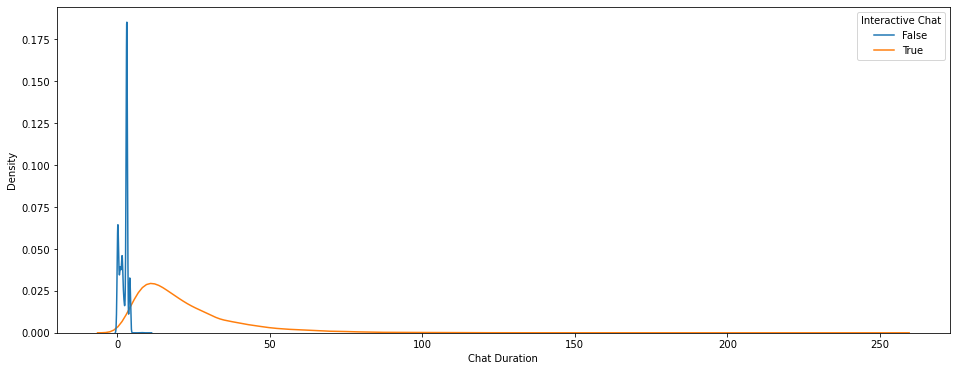

In [147]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Chat Duration"],hue=df["Interactive Chat"])
plt.show()

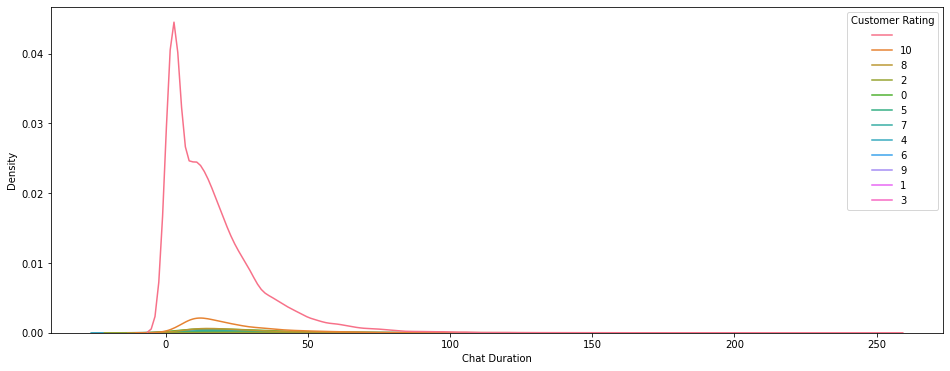

In [148]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Chat Duration"],hue=df["Customer Rating"])
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


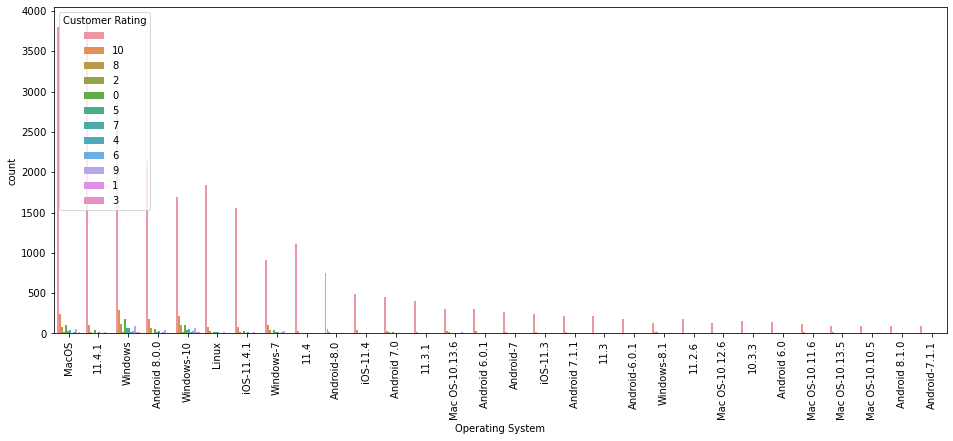

In [153]:
plt.figure(figsize=(16,6))
sns.countplot(df["Operating System"],hue=df["Customer Rating"],order=df["Operating System"].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

## Correlation between various features

In [133]:
# NA

## Trend of discrete or continious feature (if data available)

## KDE plot to see how data is spread